In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Research ISB - Data Science for Product Managers/kidsInMindSubtitles2004.csv")

In [ ]:
for col in df.columns:
    print(col)

Unnamed: 0
Unnamed: 0.1
Movie_Title
Sex_Nudity
Violence_Gore
Language
Movie_Description
Sex_Nudity_Description
Violence_Gore_Description
Language_Description
Substance_Use_Description
Discussion_Topics_Description
Message
HyperLink
subtitles


In [ ]:
!pip install ohmeow-blurr -q
!pip install bert-score -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai.text.all import *
from transformers import *
from blurr.text.data.all import *

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [ ]:
df = df.dropna().reset_index()

In [ ]:
df

,index,Unnamed: 0,Unnamed: 0.1,Movie_Title,Sex_Nudity,Violence_Gore,Language,Movie_Description,Sex_Nudity_Description,Violence_Gore_Description,Language_Description,Substance_Use_Description,Discussion_Topics_Description,Message,HyperLink,subtitles
0,0,1,1,Abduction,4,5,5,After a teenager (Taylor Lautner) discovers th...,"A teen boy and a teen girl share a lingering, ...",Two snipers shoot and kill five men (no blood ...,"At least 1 F-word, 4 scatological terms (1 mil...",Teenage boys and girls are seen drinking unide...,"The CIA, disappearances, child abductions, tru...",It can be hard to trust people when you are un...,https://kids-in-mind.com/a/abduction.htm,Advertise your product or brand here\ncontact ...
1,1,3,3,About Last Night,7,2,10,"Two couples (Keven Hart and Regina Hall, and M...",A bedroom scene features a man sitting upright...,During a drinking game (please see the Substan...,"About 67 F-words and its derivatives, 2 obsce...",A woman smokes and passes a marijuana cigarett...,"Love, sex, emotions, relationships, alcohol an...",Honest relationships are the only ones that wo...,https://kids-in-mind.com/a/aboutlastnight.htm,So? Tell me about last night.Are you kidding m...
2,2,4,4,About Schmidt,6,3,5,Warren Schmidt (Jack Nicholson) reaches retire...,A woman drops her robe revealing her bare brea...,A man finds a woman dead on the floor and we h...,"4 F-words, 2 scatological terms, 1 anatomical ...",People drink alcohol. A man takes a drug to ca...,"Retirement, aging, anger, infidelity, superfic...",Our wealth is determined by the number of last...,https://kids-in-mind.com/a/aboutschmidt.htm,"Search the thicket.Oh, leg! You're looking\nfo..."
3,3,5,5,About Time,6,4,5,SEX/NUDITY 6 – A man and his girlfriend kiss o...,A man and his girlfriend kiss on a sidewalk at...,A woman does not show up at a family party; he...,"About 5 F-words and derivatives, 1 obscene han...",A man sits at an outdoor lunch table with a gl...,"Fantasy, controlling destiny, responsibility, ...",Live each day as if it is the one you specific...,https://kids-in-mind.com/a/abouttime.htm,-== [ www.OpenSubtitles.com ] ==-<i>I always k...
4,5,7,7,"Abraham Lincoln, Vampire Hunter",5,8,5,Based on the novel by Seth Grahame-Smith: Youn...,A bare-chested man hears screaming in a downst...,A man kills vampires by slicing off their head...,"At least 1 F-word, 1 anatomical term, 4 mild o...",Several bar scenes feature men drinking whiske...,"American Civil War, legends, vampires, slavery...","Real power is not in revenge, but in truth.\n",https://kids-in-mind.com/a/abrahamlincolnvampi...,<i>History prefers legends to men.</i><i>It pr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,1993,4679,20,Van Wilder,9,5,6,A well-meaning and very popular college studen...,Two young men are shown repeatedly rubbing a d...,In a particularly gross scene young men are sh...,"16 F-words, 25 sexual references, 11 scatologi...",Young men and women are shown drinking alcohol...,"College as a career, disappointment, bad inves...",Don't take life too seriously. The future can ...,https://kids-in-mind.com/v/vanwilder.htm,25.000Edited By\nTameem666Coolidge College\nwa...
1210,1995,4683,24,Venom,2,6,5,Why is “Venom” rated PG-13? The MPAA rating ha...,woman begin to remove each other’s shirts as t...,rom a man's arms in an EMT van and strangle a ...,"F-word, 21 scatological terms, 5 anatomical t...",table is shown with large and small wine glass...,"g a super-race, extraterrestrials, symbiosis, ...",that is meant to improve humanity can backfire.,https://kids-in-mind.com/v/venom-parents-guide...,<i>Everybody asks why\nI started at the end</i...
1211,1996,4685,26,Veronica Guerin,6,8,9,Based on the true story of Dublin's Sunday Ind...,A bare-chested man is in bed with a woman whil...,"A man is shot in the head while sleeping, a ma...","40 F-words, 2 sexual references, 18 scatologic...","People are shown smoking cigarettes, drinking ...","Drug trafficking, famil

In [ ]:
!pip install profanity-check

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.1 MB/s eta 0:00:00


In [ ]:
df['subtitles'][898]

'<i>Okay, welcome back.</i><i>This is Artie Decker,\nDe Voice of the Fresno Grizzlies...</i><i>and we\'ve got a good one, my friends.</i><i>Top of the ninth here at Chukchansi\nPark, and a beautiful night.</i><i>We can actually feel\nthat fall is finally an its way.</i>It\'s a rather crisp 107 degrees, but dry.We\'ve got 15,000 sweaty and bloated\npeople all pumped up on Churros...rooting on our Fresno Grizzlies.And Brad, this is why I love\nannouncing Minor League Baseball...because I get to say names\nlike "River Cats..."or the "Rancho Cucamonga Quakes."I don\'t have to ever say boring nameslike "Tigers," or "Red Sox," or "Cubs."Okay, we got a little break in the action...as they\'re having\na little meeting on the mound.Artie, do you know what time it is?I sure do, Brad.\nIt\'s time for Artie\'s Kiss Cam!Thank you, Gwen.Let\'s see what kind of young loverswe got at the ballpark tonight.All right, there\'s a kiss.Well, you know one thing when you seea kiss like that, they\'re married

In [ ]:
df['Language_Description'][0]

'At least 1 F-word, 4 scatological terms (1 mild), 4 anatomical terms, 3 mild obscenities, name-calling (freak, psycho, foolish, boring, stubborn, little man), 4 religious exclamations.'

In [ ]:
df['subtitles'][0]

'Advertise your product or brand here\ncontact www.OpenSubtitles.org todayNATHAN: Let\'s go party![WHOOPING]Yeah, baby!Yeah! Gilly,\nget out here!BOTH: Yeah! Yeah!Let\'s go, baby,\nwe got bitches waiting![BOTH EXCLAIMING]Go! Faster!\nPut the pedal\nto the metal!Party!BOTH: Go! Go! Go!Yeah, Jake! [WHOOPS]Yeah!NATHAN: Hey, ladies.\nWe are here.You guys are crazy!Get ready to party.Yeah!We are here!GILLY: Whoa! [LAUGHING]Yo, Nathan.Dude, you\'re crazy.Yes, I am.You all right, man? Okay.Yeah, I\'m good.Let\'s do this.Let\'s go.[CROWD CLAMORING]Oh, check it out!Dude.BOY: Gilly!Yo, guys,\nbe right back.What\'s up, homey?\nCheck it out, man.Good quality.\nYou like?BOY: Thanks, man.\nThis is hot.That\'s right.\nAll right, man.\nPeace.[ALL LAUGHING]200 bucks, man.Dude, that\'s criminal.No, it\'s a fair price.I make the best fake\nIDs in Pennsylvania.You know what?\nYou should put that on\nyour college application.[ALL LAUGHING][DANCE MUSIC PLAYING]Dude! I can\'t believe\nhow, like, mainstream\n

In [ ]:
df['count'] = list(map(lambda x: x.count("fuck"), df['subtitles']))
print(df)

TypeError: ignored

In [ ]:
import re

text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", df['subtitles'][0])

In [ ]:
print(text)

Advertise your product or brand herecontact wwwOpenSubtitlesorg todayNATHAN Lets go partyWHOOPINGYeah babyYeah Gillyget out hereBOTH Yeah YeahLets go babywe got bitches waitingBOTH EXCLAIMINGGo FasterPut the pedalto the metalPartyBOTH Go Go GoYeah Jake WHOOPSYeahNATHAN Hey ladiesWe are hereYou guys are crazyGet ready to partyYeahWe are hereGILLY Whoa LAUGHINGYo NathanDude youre crazyYes I amYou all right man OkayYeah Im goodLets do thisLets goCROWD CLAMORINGOh check it outDudeBOY GillyYo guysbe right backWhats up homeyCheck it out manGood qualityYou likeBOY Thanks manThis is hotThats rightAll right manPeaceALL LAUGHING200 bucks manDude thats criminalNo its a fair priceI make the best fakeIDs in PennsylvaniaYou know whatYou should put that onyour college applicationALL LAUGHINGDANCE MUSIC PLAYINGDude I cant believehow like mainstreamyou guys areYou guys are so mainstreamI gotta get yousome undergroundYo heads upComin your wayHere we go again LAUGHSGILLY UhohHere she comesHey KarenHi Nat

In [ ]:
df['subtitles']=df['subtitles'].astype(str)

In [ ]:
print(df['subtitles'][0])

Advertise your product or brand here
contact www.OpenSubtitles.org todayNATHAN: Let's go party![WHOOPING]Yeah, baby!Yeah! Gilly,
get out here!BOTH: Yeah! Yeah!Let's go, baby,
we got bitches waiting![BOTH EXCLAIMING]Go! Faster!
Put the pedal
to the metal!Party!BOTH: Go! Go! Go!Yeah, Jake! [WHOOPS]Yeah!NATHAN: Hey, ladies.
We are here.You guys are crazy!Get ready to party.Yeah!We are here!GILLY: Whoa! [LAUGHING]Yo, Nathan.Dude, you're crazy.Yes, I am.You all right, man? Okay.Yeah, I'm good.Let's do this.Let's go.[CROWD CLAMORING]Oh, check it out!Dude.BOY: Gilly!Yo, guys,
be right back.What's up, homey?
Check it out, man.Good quality.
You like?BOY: Thanks, man.
This is hot.That's right.
All right, man.
Peace.[ALL LAUGHING]200 bucks, man.Dude, that's criminal.No, it's a fair price.I make the best fake
IDs in Pennsylvania.You know what?
You should put that on
your college application.[ALL LAUGHING][DANCE MUSIC PLAYING]Dude! I can't believe
how, like, mainstream
you guys are.You guys are so 

In [ ]:
df['subtitles'] = df['subtitles'].apply(lambda x: x.replace('/',''))
df['subtitles'] = df['subtitles'].apply(lambda x: x.replace('\xa0',''))

In [ ]:
ds=df.head(300)

In [ ]:
!pip install ohmeow-blurr -Uqq

In [ ]:
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.8/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name, 
                                                                  model_cls=BartForConditionalGeneration)

In [ ]:
!pip install transformers -Uqq

In [ ]:
from transformers import *

In [ ]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization');

In [ ]:
text_gen_kwargs={'max_length': 248,
 'min_length': 56,
 'do_sample': False,
 'early_stopping': True,
 'num_beams': 4,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'repetition_penalty': 1.0,
 'bad_words_ids': None,
 'bos_token_id': 0,
 'pad_token_id': 1,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'no_repeat_ngram_size': 3,
 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1,
 'decoder_start_token_id': 2,
 'use_cache': True,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'remove_invalid_values': False}

In [ ]:
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(
    hf_arch, hf_config, hf_tokenizer, hf_model, max_length=256, max_tgt_length=130, text_gen_kwargs=text_gen_kwargs
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=hf_batch_tfm), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader('subtitles'), get_y=ColReader('Language_Description'), splitter=RandomSplitter())

In [ ]:
dls = dblock.dataloaders(ds, bs=2)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'fr' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [ ]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=d2511e8d052ab1484464b58fa6f2ddd489bca142d3a36c340a11c72eb2a85365
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


In [ ]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt() 
learn.freeze()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
learn.fit_one_cycle(3, lr_max=3e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time
0,2.164991,1.836412,0.329231,0.180433,0.291822,0.745826,0.784500,0.762594,02:05
1,1.820158,1.744115,0.392671,0.229216,0.357945,0.792865,0.801269,0.795070,01:37
2,1.611643,1.741097,0.381565,0.218547,0.351017,0.775246,0.799553,0.784552,01:40


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your lab

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your lab

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3581: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


SuggestedLRs(valley=2.0892961401841603e-05)

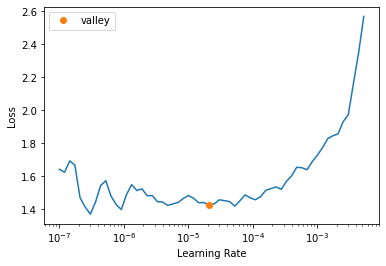

In [ ]:
learn.lr_find()

In [ ]:
df['subtitles'][0]

'Advertise your product or brand here contact www.OpenSubtitles.org todayNATHAN: Let\'s go party![WHOOPING]Yeah, baby!Yeah! Gilly, get out here!BOTH: Yeah! Yeah!Let\'s go, baby, we got bitches waiting![BOTH EXCLAIMING]Go! Faster! Put the pedal to the metal!Party!BOTH: Go! Go! Go!Yeah, Jake! [WHOOPS]Yeah!NATHAN: Hey, ladies. We are here.You guys are crazy!Get ready to party.Yeah!We are here!GILLY: Whoa! [LAUGHING]Yo, Nathan.Dude, you\'re crazy.Yes, I am.You all right, man? Okay.Yeah, I\'m good.Let\'s do this.Let\'s go.[CROWD CLAMORING]Oh, check it out!Dude.BOY: Gilly!Yo, guys, be right back.What\'s up, homey? Check it out, man.Good quality. You like?BOY: Thanks, man. This is hot.That\'s right. All right, man. Peace.[ALL LAUGHING]200 bucks, man.Dude, that\'s criminal.No, it\'s a fair price.I make the best fake IDs in Pennsylvania.You know what? You should put that on your college application.[ALL LAUGHING][DANCE MUSIC PLAYING]Dude! I can\'t believe how, like, mainstream you guys are.You 

In [ ]:
outputs = learn.blurr_generate(df['subtitles'][0], early_stopping=False, num_return_sequences=1)

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 142 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
{'generated_texts': " 1 F-word, 1 sexual reference, 1 scatological term, 1 anatomical term, 2 mild obscenities, name-calling (idiot, crazy, weirdo, stupid, stupid boy, stupid girl, stupid woman, dumb, dumb girl, dumb), exclamations (shut up), 2 religious profanities (GD), 1 religious exclamation (e.g. Oh My God, Oh God, Jesus, Jesus Christ, Oh Christ, Thank God, For Christ's Sake, Jesus Gave Me A Reason To Be Good To One Another, God Bless America, Jesus Loves His Children, Jesus Forbid Me, God Knows What, Oh My"}



In [ ]:
df['subtitles'][404]

'A Federal Grand Jury in Detroit today charged the\nthirteen top leaders of \'the Weathermen\'with plotting to bomb public buildings\nin Chicago, Detroit, New York,and Berkeley, California.\'The Weathermen\' are the militant faction of\nthe Students for a Democratic Society,only one of the thirteen is now in custody.Never before has this nation fought a war whichso many Americans opposed\nfor so many different reasons.Never has this dissent been\nas emotional, as intense,as is the dissent against\nthe war in Vietnam.The bomb went off in the State Department\nand did a lot of damageanother was detonated in Oakland.Three suspects remain at large\nafter a security guard was shot and killedduring a robbery at\nthe Bank of Michigan.The FBI has released the namesMimi Lurie, Nicholas Sloan,\nand Sharon Solarz;all members of the radical anti-war group,\n\'The Weather Underground\'.Come on you guys, let\'s go.- Bye Mom.\n- Don\'t forget I have practice after school.What are you still practicing

In [ ]:
outputs = learn.blurr_generate(df['subtitles'][404], early_stopping=False, num_return_sequences=1)

In [ ]:
for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
{'generated_texts': ' 1 F-word, 1 scatological term, 1 anatomical term, 2 mild obscenities, name-calling (idiot, idiot, jerk, stupid, idiot), 1 religious profanity, 6 religious exclamations (e.g. Oh My God, Oh God, Thank God, Jesus Christ, Oh Lord, Holy [scatological terms deleted], Jesus, God, Good Lord, Thank You, Jesus, Jesus [expletive deleted], Holy [anatomical term deleted]. | profanity glossary] 1 religious exclamation, 1 profanity (excessive profanity deleted), 6 mild anatomical terms, 3 mild obscensities, 1 derogatory term for'}



In [ ]:
df['subtitles'][898]

'Dad? Hey, Dad!Hey, Danny!- Mom says you have to come home.\n- What\'s up?She said now.So you wanna race?Come on!Come on, Danny! Push her!I won! I beat you, Dad!\nHey, Mom! I beat him!- Nestor.\n- Long time,John.How have you been?Stanley Nussbaum,\nJohn Brennick.Is this a joke?Danny, go and take care\nof the horses.Target in ten minutes.How dare you bring\na Men-Tel executive into our home.- Former. Please.\n- Stanley\'s a sympathizer.He\'s carrying the plans\nfor Men-Tel\'s new power station.We\'ve got to get him\nto resistance H.QHave you lost your mind\ncoming here?You know Men-Tel is still\nlooking for us. They even want Danny.I know that,\nbut they\'re vulnerable now.Their oil is drying up,\ntheir coal will be gone soon...and without their power station,\nMen-Tel has no power.Look,John...I know you\'ve done more for the\nresistance than anyone could ask...but we need your help again.Taking out that power plant\nwould be a big win for us.What are you talking about?\nYou can\'t win.

In [ ]:
df['Language_Description'][898]

' About 77 F-words and its derivatives, 1 obscene hand gesture, 8 sexual gestures, 25 scatological terms, 41 anatomical terms, 35 mild obscenities, 53 derogatory terms about Asians, Italians, African Americans, Mexicans, Caucasians, etc., name-calling (idiot, barbarians, morons, punk, stupid, dimwit, nuts, glutton, bonehead, old man, goon), 7 religious profanities, 17 religious exclamations.\n'

In [ ]:
outputs = learn.blurr_generate(df['subtitles'][898], early_stopping=False, num_return_sequences=1)

In [ ]:
for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
{'generated_texts': " 1 F-word, 1 scatological term, 1 anatomical term, 4 mild obscenities, name-calling (stupid, dumb, stupid, dumb), exclamations (shut-up), 1 religious profanity, 1 religious exclamation (Oh My God, Holy [anatomical profanity deleted], Oh My God). | profanity glossary (it's not pretty, but it's not that bad), 6 sexual references, 8 anatomical terms, 11 mild obscensities, 2 derogatory terms for African-Americans, 1 derogatory term for Caucasians, 2 religious profanities, 6 religious exclemations.\n"}

